# SSD Face Detection:

 - Task 1: Read input file.
 - Task 2: Use cnn algorithm detect face.
 - Task 3: Draw bounding box.

In [28]:
# Import Dlib
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
plt.rcParams['figure.dpi'] = 150
img = cv2.imread('./images/fake_ai_faces.0.png')

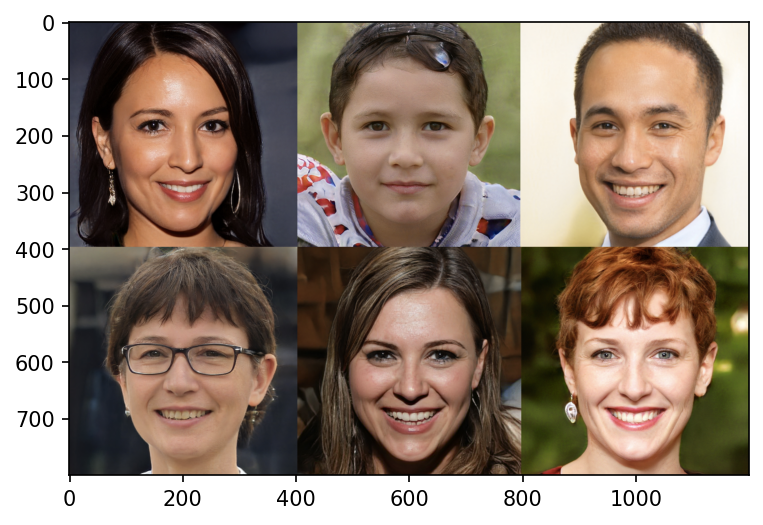

In [2]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
# Create detector
face_detection = cv2.dnn.readNetFromCaffe('./weights/deploy.prototxt.txt','./weights/res10_300x300_ssd_iter_140000.caffemodel')

In [4]:
height = img.shape[0]
width = img.shape[1]

resize_img = cv2.resize(img,(500,300))
blob_img = cv2.dnn.blobFromImage(resize_img, 1.0,(500,300),(104.0, 177.0, 123.0))


In [9]:
face_detection.setInput(blob_img)

In [11]:
detections = face_detection.forward()

In [12]:
detections

array([[[[0.        , 1.        , 0.9999933 , ..., 0.06847498,
          0.2503812 , 0.46198156],
         [0.        , 1.        , 0.9999864 , ..., 0.08510454,
          0.5905532 , 0.440095  ],
         [0.        , 1.        , 0.9999728 , ..., 0.03773971,
          0.94112146, 0.4724844 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [13]:
detections.shape

(1, 1, 200, 7)

In [24]:
num_detections = detections.shape[2]

In [25]:
num_detections

200

99.99933242797852
99.99864101409912
99.99728202819824
99.99432563781738
99.9836802482605
99.76909160614014


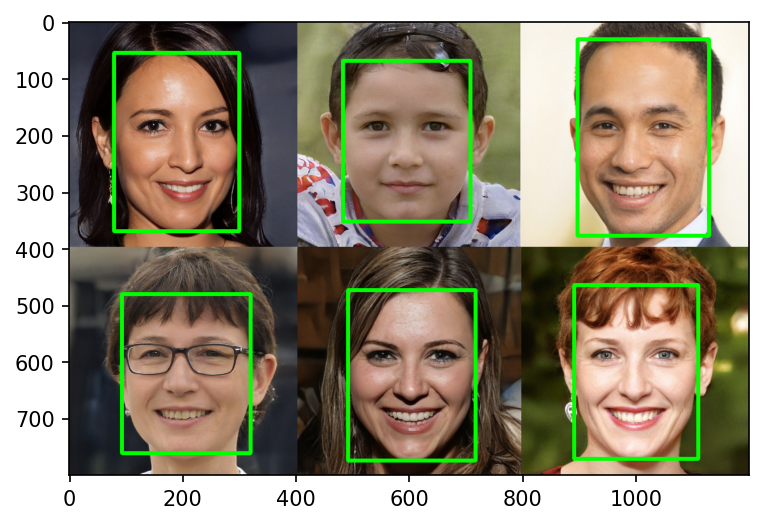

In [33]:
img_copy = img.copy()

for index in range(num_detections):
    detection_confidence = detections[0,0,index,2]
    
    if detection_confidence > 0.99:
        locations = detections[0,0,index,3:7] * np.array([width,height,width,height])
        print(detection_confidence * 100)
        x,y,xx,yy = locations.astype('int')
        cv2.rectangle(img_copy,(x,y),(xx,yy),(0,255,0),5)
        
        
plt.imshow(cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB))